In [1]:
from epi_model import *

In [27]:
list(ct.items())[0]

((0, 44), 2)

In [19]:
ct = Counter(
    (a,t)
    for (a,b,t)
    in a.edgelist
) + Counter(
    (b,t)
    for (a,b,t)
    in a.edgelist
)

In [20]:
ct.most_common(20)

[((459, 557), 508),
 ((557, 459), 507),
 ((137, 187), 421),
 ((187, 137), 421),
 ((378, 179), 408),
 ((179, 378), 406),
 ((567, 25), 391),
 ((25, 567), 390),
 ((604, 235), 386),
 ((235, 604), 383),
 ((299, 386), 369),
 ((386, 299), 368),
 ((238, 194), 356),
 ((194, 238), 355),
 ((777, 586), 354),
 ((586, 777), 352),
 ((171, 211), 351),
 ((211, 171), 351),
 ((185, 365), 341),
 ((365, 185), 341)]

In [24]:
list(ct)[0]

(0, 44)

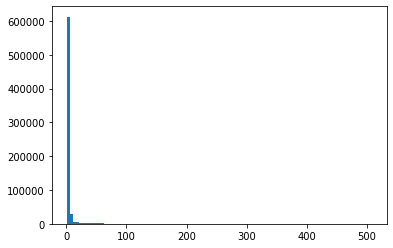

In [30]:
plt.hist( [v for v in ct.values()], bins=100 );

In [31]:
ctt = Counter( ct.values() )

In [36]:
ctt[1] / sum(ctt.values())

0.3343372240910009

In [41]:
sum(ctt[ii] for ii in range(1,2)) / sum(ctt.values())

0.3343372240910009

In [14]:
for typ in ['high school','high school2', 'primary school']:

    a = temporalNetwork.load(typ)
    wtd = a.to_weighted()
    
    import csv
    with open(f'{typ}.csv', 'w') as outf:
        w = csv.writer(outf)
        w.writerows([(a,b,int(c)) for a,b,c in wtd.edgelist])

ValueError: too many values to unpack (expected 3)

In [ ]:
a = temporalNetwork.load('high school')

In [ ]:
wtd = a.to_weighted()

In [5]:
# each are 20s...

r_weak = ( 2 * 60 / 20, 20 * 60 / 20 )
r_strong = ( 60 * 60 / 20, float('inf') )

In [11]:
el1 = [
    (a,b,w)
    for a,b,w in wtd.edgelist
    if r_weak[0] <= w <= r_weak[1]
]

AttributeError: '_csv.writer' object has no attribute 'edgelist'

In [ ]:
el2 = [
    (a,b,int(w))
    for a,b,w in w.edgelist
    if r_strong[0] <= w <= r_strong[1]
]

In [9]:
len(el1), len(el2)

(3618, 454)

In [10]:
import csv
with open('weak.csv', 'w') as outf:
    w = csv.writer(outf)
    w.writerows(el1)
    
with open('strong.csv', 'w') as outf:
    w = csv.writer(outf)
    w.writerows(el2)

In [6]:
list(w.ego_edges.items())[0]

(454,
 {640: 182.0,
  520: 2.0,
  866: 12.0,
  874: 64.0,
  156: 10.0,
  502: 7.0,
  54: 1.0,
  576: 2.0,
  605: 12.0,
  869: 5.0,
  691: 1.0,
  642: 8.0,
  658: 2.0,
  159: 13.0,
  1412: 19.0,
  525: 3.0,
  201: 1.0,
  245: 2.0,
  687: 1.0,
  634: 1.0,
  420: 4.0,
  38: 1.0,
  243: 8.0,
  1212: 18.0,
  134: 1.0,
  582: 1.0})